<a href="https://colab.research.google.com/github/Nemipatel210/GIS/blob/main/ps1_GIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Interest:

My research interest is applying GIS and data science techniques to study agriculture and land use dynamics. Agriculture is influenced by various spatial and temporal factors, including crop growth patterns, soil quality, water availability, land cover change, and the economic value of land. By integrating spatial datasets such as land parcels, remote sensing imagery, crop statistics, socio-economic indicators, etc, I aim to explore how agricultural land use evolves and relates to broader drivers such as climate variability, population growth, and market demand.

This cell installs the necessary libraries, `geopandas` and `mapclassify`, for working with geospatial data and creating thematic maps. The `%%capture` magic command is used to suppress the output of the installation process.

In [1]:
%%capture
#!pip install geopandas #==1.0.1
!pip install mapclassify #sometimes have to install library which you get from https://pypi.org/

This cell imports the required Python libraries, including `os`, `zipfile` for file operations, `pandas` for data manipulation, `matplotlib.pyplot` and `seaborn` for plotting, `geopandas` for geospatial data handling, and `mapclassify` for map classification. It also sets display options for the notebook.

In [2]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps: a sister of pandas; does the job;
#tho not as fancy-interactive as folium or leafmap https://geopandas.org/

import mapclassify #need for thematic map classification

import seaborn as sns

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

#from google.colab import data_table
#data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )
from google.colab.data_table import DataTable
DataTable.max_columns = 250

This cell checks and displays the installed version of the `geopandas` library.

In [3]:
#!python --version
gpd.__version__

'1.1.1'

This cell downloads a zip file containing Texas County Boundary shapefiles from a GitHub repository using the `wget` command.

In [4]:
! wget -q -O Texas_County_Boundaries_4845315375211121464.zip https://raw.githubusercontent.com/Nemipatel210/GIS/6c673d7fa088d4803b52ba23025623d675de0a7f/Texas_County_Boundaries_4845315375211121464.zip

This cell unzips the downloaded Texas County Boundary shapefile.

In [5]:
zip_ref = zipfile.ZipFile('Texas_County_Boundaries_4845315375211121464.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping

This cell lists the files in the current directory to show the extracted shapefiles.

In [6]:
!ls

County_Boundaries.cpg  County_Boundaries.shp.xml
County_Boundaries.dbf  County_Boundaries.shx
County_Boundaries.prj  sample_data
County_Boundaries.shp  Texas_County_Boundaries_4845315375211121464.zip


This cell reads the downloaded Texas County Boundary shapefile into a GeoDataFrame named `txC0` using `geopandas.read_file()`.

In [7]:
txC0=gpd.read_file('County_Boundaries.shp')

This cell displays the first 5 rows of the `txC0` GeoDataFrame to inspect its structure and data.

In [8]:
txC0.head(5)

,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,geometry
0,232,232,48463,232,15,Uvalde,232,15,35,"POLYGON ((-11076323.621 3386738.492, -11076452..."
1,143,143,48285,143,13,Lavaca,143,13,36,"POLYGON ((-10783021.183 3456095.21, -10783006...."
2,20,20,48039,20,12,Brazoria,20,12,37,"POLYGON ((-10606980.495 3451945.262, -10606969..."
3,241,241,48481,241,13,Wharton,241,13,38,"POLYGON ((-10706181.772 3456563.942, -10706152..."
4,163,163,48325,163,15,Medina,163,15,39,"POLYGON ((-11066621.012 3397753.016, -11066621..."


The map displays a geographical outline of the state of **Texas**, with its internal borders divided by county. The coordinates on the axes indicate a projected coordinate system, likely used in data analysis for plotting location-based information.

<Axes: >

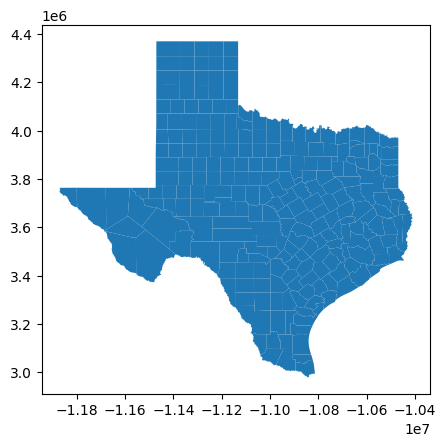

In [9]:
txC0.plot()

This cell downloads another zip file containing Texas County Cartographic shapefiles and unzips it.

In [10]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O TexasCountiesCartographic.zip https://github.com/Nemipatel210/GIS/raw/59bf3c13164b92498dd27aaef7783f833d5a1852/TexasCountiesCartographic.zip
zip_ref = zipfile.ZipFile('TexasCountiesCartographic.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping

This cell lists the files in the current directory again to show the newly extracted shapefiles.

In [11]:
!ls

County_Boundaries.cpg
County_Boundaries.dbf
County_Boundaries.prj
County_Boundaries.shp
County_Boundaries.shp.xml
County_Boundaries.shx
geo_export_5daba26a-1a9f-44f5-af78-b6c2b8a01b32.cpg
geo_export_5daba26a-1a9f-44f5-af78-b6c2b8a01b32.dbf
geo_export_5daba26a-1a9f-44f5-af78-b6c2b8a01b32.prj
geo_export_5daba26a-1a9f-44f5-af78-b6c2b8a01b32.shp
geo_export_5daba26a-1a9f-44f5-af78-b6c2b8a01b32.shx
sample_data
TexasCountiesCartographic.zip
Texas_County_Boundaries_4845315375211121464.zip


This cell reads the newly downloaded Texas County Cartographic shapefile into a GeoDataFrame named `txC1`.

In [12]:
txC1=gpd.read_file('geo_export_5daba26a-1a9f-44f5-af78-b6c2b8a01b32.shp')

This cell displays information about the `txC1` GeoDataFrame, including the column names, non-null counts, and data types.

In [13]:
txC1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   statefp   254 non-null    object  
 1   countyfp  254 non-null    object  
 2   countyns  254 non-null    object  
 3   affgeoid  254 non-null    object  
 4   geoid     254 non-null    object  
 5   name      254 non-null    object  
 6   lsad      254 non-null    object  
 7   aland     254 non-null    object  
 8   awater    254 non-null    object  
 9   geometry  254 non-null    geometry
dtypes: geometry(1), object(9)
memory usage: 20.0+ KB


This cell displays the first 10 rows of the `txC1` GeoDataFrame to inspect its structure and data, including column names like 'name' and 'aland'.

In [14]:
txC1.head(10)

,statefp,countyfp,countyns,affgeoid,geoid,name,lsad,aland,awater,geometry
0,48,421,01383996,0500000US48421,48421,Sherman,06,2390651189,428754,"POLYGON ((-102.16246 36.50033, -102.03234 36.5..."
1,48,493,01384032,0500000US48493,48493,Wilson,06,2081662847,12111367,"POLYGON ((-98.40734 29.11444, -98.13417 29.441..."
2,48,115,01383843,0500000US48115,48115,Dawson,06,2331781556,4720730,"POLYGON ((-102.20852 32.95896, -102.07621 32.9..."
3,48,069,01383820,0500000US48069,48069,Castro,06,2316573415,12584396,"POLYGON ((-102.52518 34.74693, -102.16884 34.7..."
4,48,279,01383926,0500000US48279,48279,Lamb,06,2631897577,3973764,"POLYGON ((-102.61515 34.31289, -102.52563 34.3..."
5,48,385,01383978,0500000US48385,48385,Real,06,1810812906,2346258,"POLYGON ((-100.03088 29.84827, -100.0023 29.89..."
6,48,359,01383965,0500000US48359,48359,Oldham,06,3886337121,2339716,"POLYGON ((-103.04155 35.62249, -103.04155 35.6..."
7,48,127,01383849,0500000US48127,48127,Dimmit,06,3441795365,14576538,"POLYGON ((-100.11434 28.64812, -99.40902 28.64..."
8,48,305,01383938,0500000US48305,48305,Lynn,06,2309924845,4169719,"POLYGON ((-102.07593 33.38959, -101.55688 33.3..."
9,48,171,01383871,0500000US48171,48171,Gillespie,06,2740716834,9015052,"POLYGON ((-99.304 30.49983, -98.96423 30.49848..."


The map shows the land area of each of Texas's 254 counties. The color of each county corresponds to its size in square meters, with the smallest counties appearing dark purple and the largest counties, particularly in West Texas, appearing yellow. For example, Brewster County is the largest county, and its size is over 6,100 square miles (or over 16,000 square kilometers). In contrast, the smallest county, Rockwall County, is less than 150 square miles. The map visually demonstrates the vast difference in land area between Texas counties.

<Axes: >

Text(0.5, 1.0, 'Thematic Map of Land Area by County')

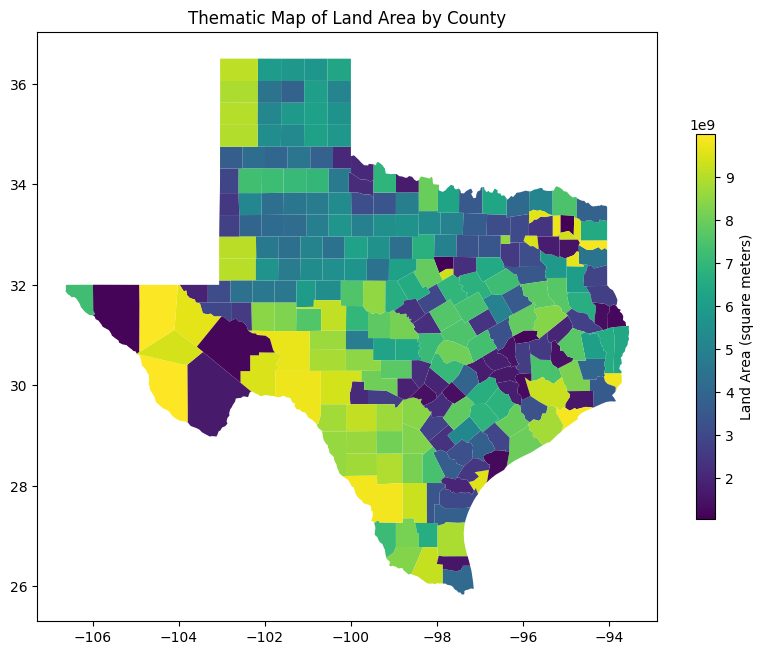

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# Plot without the legend argument in plot()
txC1.plot(column='aland', ax=ax, cmap='viridis')

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=txC1['aland'].min(), vmax=txC1['aland'].max()))
sm._A = [] # Hack to make the colorbar work with ScalarMappable
cbar = fig.colorbar(sm, ax=ax, shrink=0.5) # Use shrink here
cbar.set_label('Land Area (square meters)')


ax.set_title('Thematic Map of Land Area by County')
plt.show()

This is a thematic map of Texas that visualizes the amount of water area within each county. The map uses a color gradient of blues, where darker shades represent a greater surface area of water, while lighter shades and white indicate less water. The legend on the right confirms that the measurement is in square meters. The map's pattern clearly shows that counties in the eastern and southeastern parts of the state, where major reservoirs, lakes, and rivers are located, have a significantly larger water area. In contrast, counties in the arid western and panhandle regions contain very little surface water, appearing as light blue or white on the map. This visual representation effectively highlights the geographical distribution of Texas's water resources.

<Axes: >

Text(0.5, 1.0, 'Thematic Map of Water Area by County')

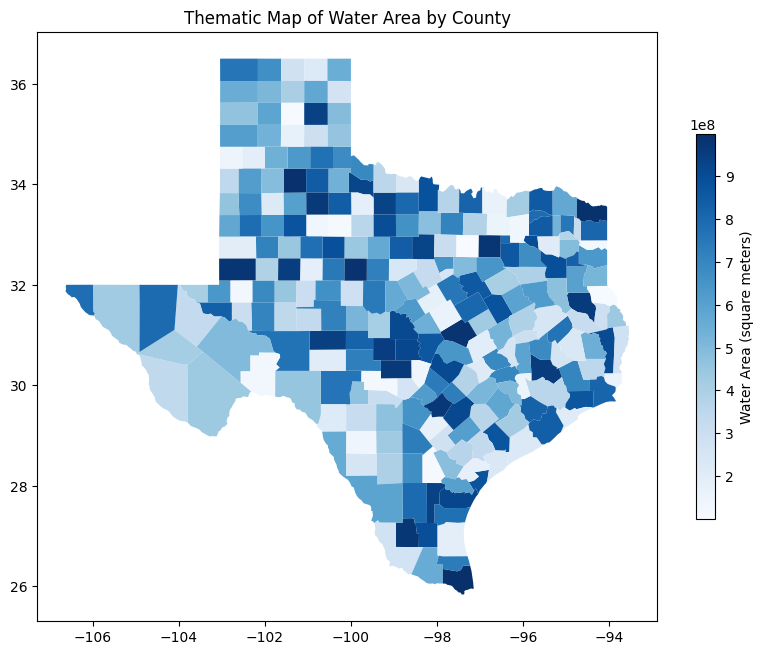

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# Plot without the legend argument in plot()
txC1.plot(column='awater', ax=ax, cmap='Blues')

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=txC1['awater'].min(), vmax=txC1['awater'].max()))
sm._A = [] # Hack to make the colorbar work with ScalarMappable
cbar = fig.colorbar(sm, ax=ax, shrink=0.5) # Use shrink here
cbar.set_label('Water Area (square meters)')


ax.set_title('Thematic Map of Water Area by County')
plt.show()

In [17]:
url = 'https://raw.githubusercontent.com/Nemipatel210/GIS/984dcc3aa5ee5cb814d0f6fe0653ce9c8ca02af3/croptotal2022.csv'
crop2022_df = pd.read_csv(url)
display(crop2022_df.head(5))

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2022,YEAR,NaN,COUNTY,TEXAS,48,BLACKLANDS,40,BELL,...,NaN,NaN,0,NaN,CROP TOTALS,"CROP TOTALS - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,"49,734,000",(L)
1,CENSUS,2022,YEAR,NaN,COUNTY,TEXAS,48,BLACKLANDS,40,BOSQUE,...,NaN,NaN,0,NaN,CROP TOTALS,"CROP TOTALS - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,"21,771,000",(L)
2,CENSUS,2022,YEAR,NaN,COUNTY,TEXAS,48,BLACKLANDS,40,COLLIN,...,NaN,NaN,0,NaN,CROP TOTALS,"CROP TOTALS - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,"45,111,000",(L)
3,CENSUS,2022,YEAR,NaN,COUNTY,TEXAS,48,BLACKLANDS,40,COOKE,...,NaN,NaN,0,NaN,CROP TOTALS,"CROP TOTALS - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,"19,860,000",(L)
4,CENSUS,2022,YEAR,NaN,COUNTY,TEXAS,48,BLACKLANDS,40,CORYELL,...,NaN,NaN,0,NaN,CROP TOTALS,"CROP TOTALS - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,"16,052,000",(L)


In [18]:
print("Number of rows in crop2022_df:", crop2022_df.shape[0])

Number of rows in crop2022_df: 254


In [19]:
print("Number of rows in tx:", txC0.shape[0])

Number of rows in tx: 254


In [20]:
tx = txC0.sort_values('CNTY_NM')
crop2022_df = crop2022_df.sort_values('County')


In [21]:
tx['CNTY_NM'] = tx['CNTY_NM'].str.upper()
crop2022_df['County'] = crop2022_df['County'].str.upper()

In [22]:
tx.head(5)

,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,geometry
155,1,1,48001,1,10,ANDERSON,1,10,136,"POLYGON ((-10622770.07 3774372.952, -10622743...."
101,2,2,48003,2,6,ANDREWS,2,6,155,"POLYGON ((-11452352.064 3832169.96, -11452055...."
124,3,3,48005,3,11,ANGELINA,3,11,105,"POLYGON ((-10560243.006 3701241.912, -10560220..."
82,4,4,48007,4,16,ARANSAS,4,16,15,"POLYGON ((-10775558.316 3283921.376, -10776779..."
222,5,5,48009,5,3,ARCHER,5,3,208,"POLYGON ((-10956443.534 3973368.927, -10956442..."


In [23]:
crop2022_df.head(5)

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
49,CENSUS,2022,YEAR,NaN,COUNTY,TEXAS,48,EAST TEXAS NORTH,51,ANDERSON,...,NaN,NaN,0,NaN,CROP TOTALS,"CROP TOTALS - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,"24,811,000",(L)
199,CENSUS,2022,YEAR,NaN,COUNTY,TEXAS,48,SOUTHERN HIGH PLAINS,12,ANDREWS,...,NaN,NaN,0,NaN,CROP TOTALS,"CROP TOTALS - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,"5,343,000",(L)
73,CENSUS,2022,YEAR,NaN,COUNTY,TEXAS,48,EAST TEXAS SOUTH,52,ANGELINA,...,NaN,NaN,0,NaN,CROP TOTALS,"CROP TOTALS - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,"6,298,000",(L)
25,CENSUS,2022,YEAR,NaN,COUNTY,TEXAS,48,COASTAL BEND,82,ARANSAS,...,NaN,NaN,0,NaN,CROP TOTALS,"CROP TOTALS - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,"688,000",(L)
30,CENSUS,2022,YEAR,NaN,COUNTY,TEXAS,48,CROSS TIMBERS,30,ARCHER,...,NaN,NaN,0,NaN,CROP TOTALS,"CROP TOTALS - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,"8,344,000",(L)


In [24]:
tx_crop2022 = tx.merge(crop2022_df, left_on='CNTY_NM', right_on='County', how='inner')

In [25]:
tx_crop2022_plot = tx_crop2022[['CNTY_NM', 'geometry', 'Value']]
display(tx_crop2022_plot.head(5))

,CNTY_NM,geometry,Value
0,ANDERSON,"POLYGON ((-10622770.07 3774372.952, -10622743....","24,811,000"
1,ANDREWS,"POLYGON ((-11452352.064 3832169.96, -11452055....","5,343,000"
2,ANGELINA,"POLYGON ((-10560243.006 3701241.912, -10560220...","6,298,000"
3,ARANSAS,"POLYGON ((-10775558.316 3283921.376, -10776779...","688,000"
4,ARCHER,"POLYGON ((-10956443.534 3973368.927, -10956442...","8,344,000"


In [26]:
tx_crop2022_plot['Value'] = tx_crop2022_plot['Value'].astype(str).str.replace(',', '', regex=False).str.replace(' (D)', '', regex=False)
tx_crop2022_plot['Value'] = pd.to_numeric(tx_crop2022_plot['Value'])
display(tx_crop2022_plot.head())

/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,CNTY_NM,geometry,Value
0,ANDERSON,"POLYGON ((-10622770.07 3774372.952, -10622743....",24811000.0
1,ANDREWS,"POLYGON ((-11452352.064 3832169.96, -11452055....",5343000.0
2,ANGELINA,"POLYGON ((-10560243.006 3701241.912, -10560220...",6298000.0
3,ARANSAS,"POLYGON ((-10775558.316 3283921.376, -10776779...",688000.0
4,ARCHER,"POLYGON ((-10956443.534 3973368.927, -10956442...",8344000.0


In [27]:
tx_crop2022_plot.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CNTY_NM   254 non-null    object  
 1   geometry  254 non-null    geometry
 2   Value     244 non-null    float64 
dtypes: float64(1), geometry(1), object(1)
memory usage: 6.1+ KB


In [28]:
txC1['name'] = txC1['name'].str.upper()
txC1_crop2022 = txC1.merge(tx_crop2022, left_on='name', right_on='CNTY_NM', how='inner')
display(txC1_crop2022.head(5))

,statefp,countyfp,countyns,affgeoid,geoid,name,lsad,aland,awater,geometry_x,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,48,421,01383996,0500000US48421,48421,SHERMAN,06,2390651189,428754,"POLYGON ((-102.16246 36.50033, -102.03234 36.5...",...,NaN,NaN,0,NaN,CROP TOTALS,"CROP TOTALS - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,"190,706,000",(L)
1,48,493,01384032,0500000US48493,48493,WILSON,06,2081662847,12111367,"POLYGON ((-98.40734 29.11444, -98.13417 29.441...",...,NaN,NaN,0,NaN,CROP TOTALS,"CROP TOTALS - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,"12,872,000",(L)
2,48,115,01383843,0500000US48115,48115,DAWSON,06,2331781556,4720730,"POLYGON ((-102.20852 32.95896, -102.07621 32.9...",...,NaN,NaN,0,NaN,CROP TOTALS,"CROP TOTALS - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,"49,659,000",(L)
3,48,069,01383820,0500000US48069,48069,CASTRO,06,2316573415,12584396,"POLYGON ((-102.52518 34.74693, -102.16884 34.7...",...,NaN,NaN,0,NaN,CROP TOTALS,"CROP TOTALS - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,"96,353,000",(L)
4,48,279,01383926,0500000US48279,48279,LAMB,06,2631897577,3973764,"POLYGON ((-102.61515 34.31289, -102.52563 34.3...",...,NaN,NaN,0,NaN,CROP TOTALS,"CROP TOTALS - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,"78,896,000",(L)


In [29]:
txC1_crop2022_selected = txC1_crop2022[['aland', 'geometry_x', 'Value', 'name']]
display(txC1_crop2022_selected.head())

,aland,geometry_x,Value,name
0,2390651189,"POLYGON ((-102.16246 36.50033, -102.03234 36.5...","190,706,000",SHERMAN
1,2081662847,"POLYGON ((-98.40734 29.11444, -98.13417 29.441...","12,872,000",WILSON
2,2331781556,"POLYGON ((-102.20852 32.95896, -102.07621 32.9...","49,659,000",DAWSON
3,2316573415,"POLYGON ((-102.52518 34.74693, -102.16884 34.7...","96,353,000",CASTRO
4,2631897577,"POLYGON ((-102.61515 34.31289, -102.52563 34.3...","78,896,000",LAMB


In [30]:
txC1_crop2022_selected.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   aland       253 non-null    object  
 1   geometry_x  253 non-null    geometry
 2   Value       253 non-null    object  
 3   name        253 non-null    object  
dtypes: geometry(1), object(3)
memory usage: 8.0+ KB


In [31]:
txC1_crop2022_selected['Value'] = pd.to_numeric(txC1_crop2022_selected['Value'].astype(str).str.replace(',', '', regex=False), errors='coerce')
txC1_crop2022_selected['aland'] = pd.to_numeric(txC1_crop2022_selected['aland'], errors='coerce')
txC1_crop2022_selected['value_density'] = txC1_crop2022_selected['Value'] / txC1_crop2022_selected['aland']
display(txC1_crop2022_selected.head(5))

/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.12/dist-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,aland,geometry_x,Value,name,value_density
0,2390651189,"POLYGON ((-102.16246 36.50033, -102.03234 36.5...",190706000.0,SHERMAN,0.079772
1,2081662847,"POLYGON ((-98.40734 29.11444, -98.13417 29.441...",12872000.0,WILSON,0.006184
2,2331781556,"POLYGON ((-102.20852 32.95896, -102.07621 32.9...",49659000.0,DAWSON,0.021297
3,2316573415,"POLYGON ((-102.52518 34.74693, -102.16884 34.7...",96353000.0,CASTRO,0.041593
4,2631897577,"POLYGON ((-102.61515 34.31289, -102.52563 34.3...",78896000.0,LAMB,0.029977


This thematic map of Texas illustrates the density of crop value for each county. The map uses a color gradient from light yellow to dark blue to represent the value of crops per unit of land area. Counties in light yellow have the lowest crop value density, which is common in the arid western and panhandle regions, where the landscape is less suited for farming. In contrast, the counties with the highest crop value density are shaded in dark blue and are concentrated in the fertile, agriculturally rich areas of Central, Eastern, and Southern Texas, including the Gulf Coast, indicating a much higher crop output and value per square meter in these regions. The map effectively visualizes the significant geographical differences in agricultural productivity across the state.

<Axes: >

Text(0.5, 1.0, 'Thematic Map of Crop Value Density by County')

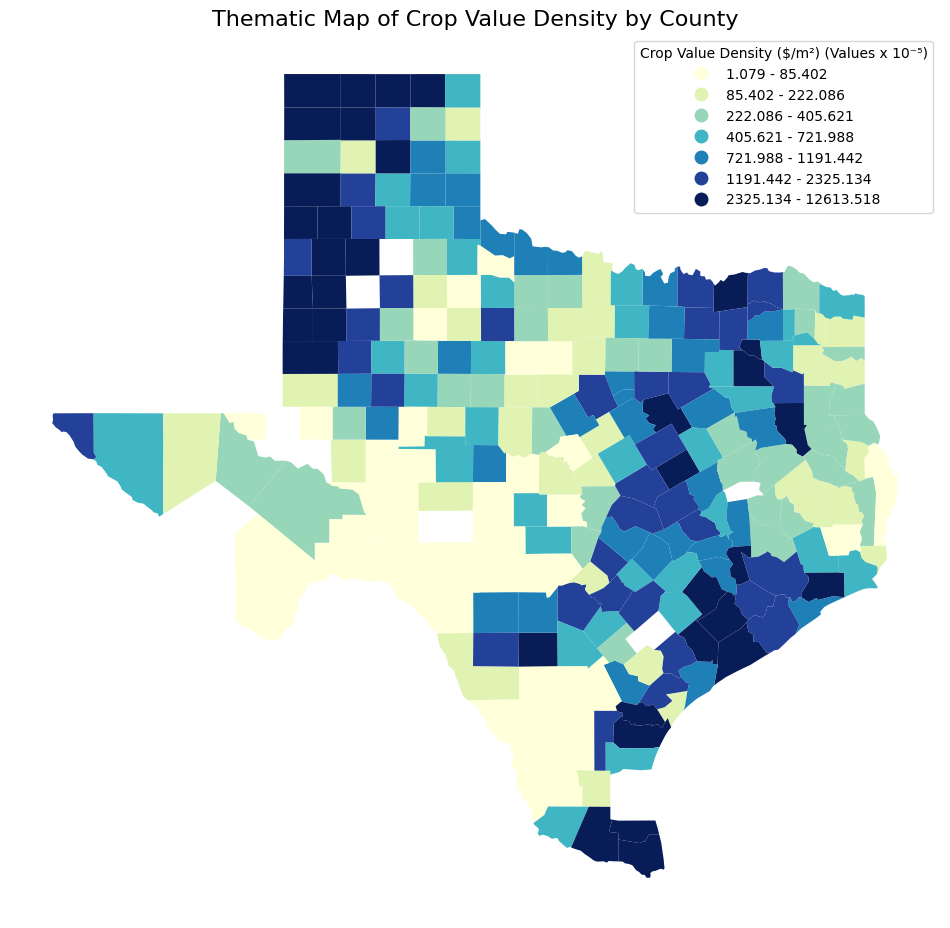

In [40]:
import mapclassify
import matplotlib.pyplot as plt

# Drop rows with NaN in 'value_density' before plotting
txC1_crop2022_selected_plot = txC1_crop2022_selected.dropna(subset=['value_density']).set_geometry('geometry_x')

# Define the classification scheme (e.g., Quantiles) and number of classes
k_classes = 7
classifier = mapclassify.Quantiles(txC1_crop2022_selected_plot['value_density'], k=k_classes)

# Scale the bin boundaries by 10^5 and format the legend labels
# The values are already multiplied by 10^5 in the prompt's legend, so we multiply the bins by 10^5
scaled_bins = [b * 1e5 for b in classifier.bins]
scaled_min = txC1_crop2022_selected_plot["value_density"].min() * 1e5
legend_labels = []

# Create the first label with the minimum value
legend_labels.append(f'{scaled_min:.3f} - {scaled_bins[0]:.3f}')

# Create subsequent labels
for i in range(1, len(scaled_bins)):
    legend_labels.append(f'{scaled_bins[i-1]:.3f} - {scaled_bins[i]:.3f}')

# The last bin's upper bound is the maximum value in the dataset
legend_labels[-1] = f'{scaled_bins[-2]:.3f} - {txC1_crop2022_selected_plot["value_density"].max() * 1e5:.3f}'


# Create the figure and axes
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot the data using the defined classification
txC1_crop2022_selected_plot.plot(column='value_density',
                                 ax=ax,
                                 legend=True,
                                 cmap='YlGnBu',
                                 scheme='Quantiles',
                                 classification_kwds={'k': k_classes},
                                 legend_kwds={'loc': 'upper right', 'labels': legend_labels,
                                              'title': 'Crop Value Density ($/m²) (Values x 10⁻⁵)'})


ax.set_title('Thematic Map of Crop Value Density by County', fontsize=16)
ax.set_axis_off()
plt.show()